In [2]:
import re
import emoji
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime

In [3]:
warnings.filterwarnings ('ignore')
pd.set_option ('display.width', None)
pd.set_option ('display.max_rows', 100)
pd.set_option ('display.max_columns', 50)

# Pipeline

0. Raw data

1. Language dectection (*langdetect*)

2. Missing Values

3. Duplicates

4. Xoá ký hiệu/dấu lạ

5. Xoá dòng trống, khoảng trắng thừa

6. Chuẩn hoá / Bỏ emoji

7. Viết tắt

8. Viết sai chính tả

9. Lowercase + chuẩn hoá Unicode

10. LASER / LaBSE

11. Feature Extraction

12. Train model

    - Logistic Regression

    - Naive Bayes

    - Support Vector Machine

    - Decision Tree

    - Random Forest

    - XGBoost

    - CatBoost

    - LightGBM

# 0. Raw Data

In [4]:
data = pd.read_csv ('Full_Dataset_en_vi.csv').drop ('Unnamed: 0', axis=1)
data

,Content,Likes,Per_Rating,Source,Time_Review,language,label
0,"Nhân viên không thuyết minh trên xe, mà lại đi...",NaN,1/5 trên KKday,Do KKday thu thập,Nhận xét vào Tháng 11 2019 trên KKday,vi,NEG
1,Đây là khu vui chơi mới nên tất cả còn tô...,NaN,4/5 trên KKday,Do KKday thu thập,Nhận xét vào Tháng 7 2024 trên KKday,vi,NEU
2,Rất nhiều trò chơi thú vị. nhưng phần tham qua...,NaN,5/5 trên KKday,Do KKday thu thập,Nhận xét vào Tháng 7 2024 trên KKday,vi,NEU
3,Bình thường thôi. Trẻ em thì thích,NaN,4/5 trên KKday,Do KKday thu thập,Nhận xét vào Tháng 7 2024 trên KKday,vi,NEU
4,"Xe buýt sạch sẽ, tài xế chạy an toàn. Tuy nhiê...",NaN,5/5 trên KKday,Do KKday thu thập,Nhận xét vào Tháng 9 2022 trên KKday,vi,NEU
...,...,...,...,...,...,...,...
10189,Had a really great tour with Kevin. It was rea...,NaN,4/5 trên Tripadvisor,Do Tripadvisor thu thập,Nhận xét vào Tháng 10 2022 trên Tripadvisor,en,POS
10190,Good tour with lovely people. There were four ...,NaN,4/5 trên Viator,Do Viator thu thập,Nhận xét vào Tháng 9 2023 trên Viator,en,POS
10191,Our tour guide Alex was fantastic. He was very...,NaN,5/5 trên Tripadvisor,Do Tripadvisor thu thập,Nhận xét vào Tháng 2 2025 trên Tripadvisor,en,POS
10192,"We had a great tour guided by Lucy, very infor...",NaN,5/5 trên Tripadvisor,Do Tripadvisor thu thập,Nhận xét vào Tháng 10 2019 trên Tripadvisor,en,POS


## Label Distribution

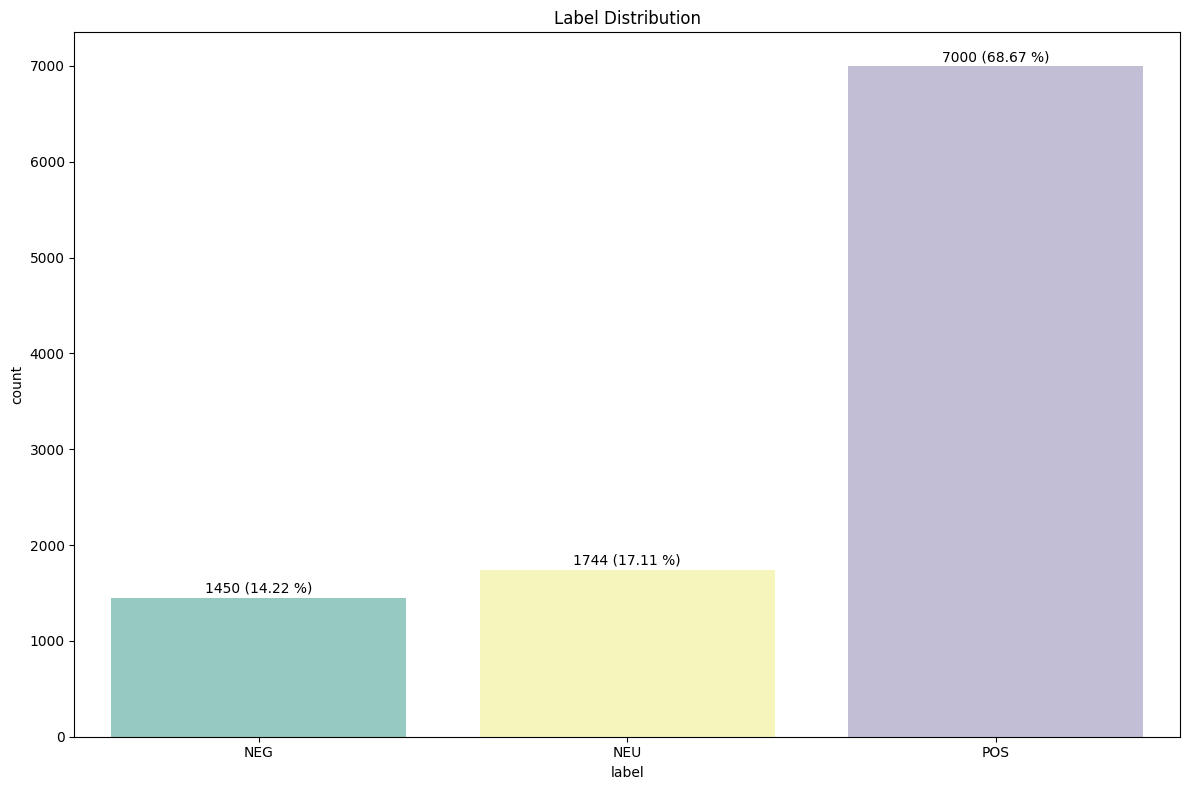

In [5]:
figure = plt.figure (figsize=(12,8))
ax = sns.countplot (x='label', data=data, palette='Set3')
for p in ax.patches:
    height = p.get_height ()
    ax.text (
        p.get_x () + p.get_width ()/2,
        height + 50,
        f"{int (height)} ({(int (height) * 100 / len (data)):.2f} %)",
        ha='center'
    )
    
plt.title ('Label Distribution')
plt.tight_layout ()
plt.show ()

## Language + Label Distribution

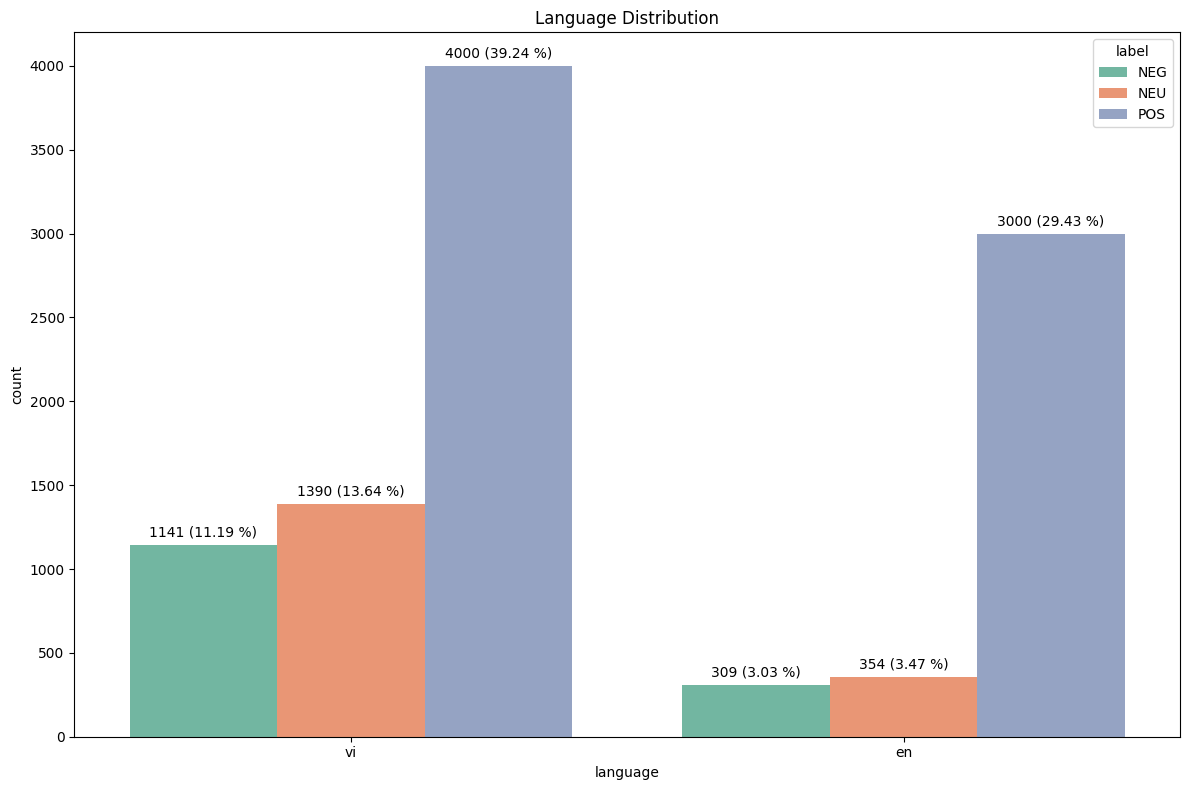

In [6]:
figure = plt.figure (figsize=(12,8))
ax = sns.countplot (x='language',hue='label', data=data, palette='Set2')
for p in ax.patches:
    height = p.get_height ()
    if height > 0:
        ax.text (
            p.get_x () + p.get_width ()/2,
            height + 50,
            f"{int (height)} ({(int (height) * 100 / len (data)):.2f} %)",
            ha='center'
        )
    
plt.title ('Language Distribution')
plt.tight_layout ()
plt.show ()

# 1. Language Detection

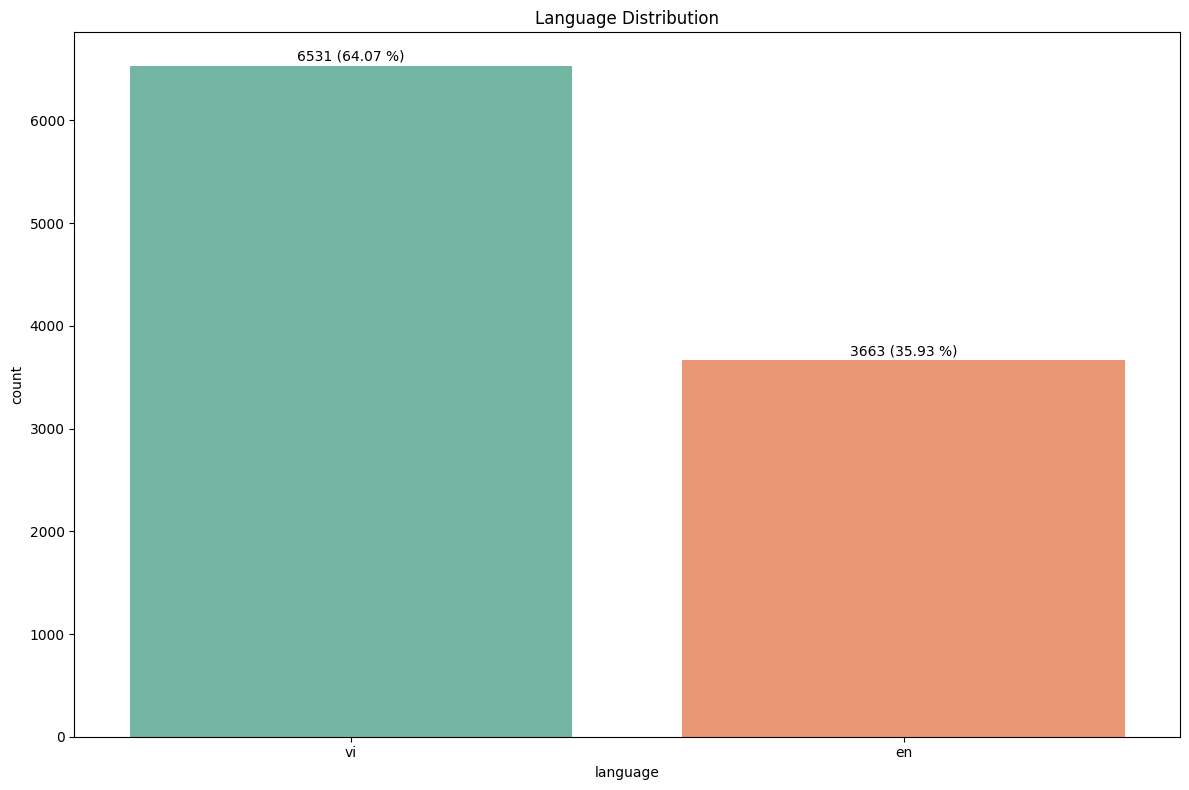

In [7]:
figure = plt.figure (figsize=(12,8))
ax = sns.countplot (x='language', data=data, palette='Set2')
for p in ax.patches:
    height = p.get_height ()
    ax.text (
        p.get_x () + p.get_width ()/2,
        height + 50,
        f"{int (height)} ({(int (height) * 100 / len (data)):.2f} %)",
        ha='center'
    )
    
plt.title ('Language Distribution')
plt.tight_layout ()
plt.show ()

# 2. Missing Values

In [8]:
data_type = pd.DataFrame (data.dtypes, columns=['Data Type'])
Missing_Value = pd.DataFrame ({
    'Missing Count' : data.isna ().sum (),
    'Missing Percentage' : data.isna ().sum () * 100 / len (data)
})
Missing_Value = pd.concat ([data_type, Missing_Value], axis=1)
Missing_Value

,Data Type,Missing Count,Missing Percentage
Content,object,0,0.00000
Likes,float64,3602,35.33451
Per_Rating,object,0,0.00000
Source,object,6592,64.66549
Time_Review,object,0,0.00000
language,object,0,0.00000
label,object,0,0.00000


## Missing `"Likes"`

In [9]:
data ['Likes'] = data ['Likes'].fillna (0)

## Missing `"Source"`

In [10]:
data.drop ('Source', axis=1, inplace=True)

## Result

In [11]:
data_type = pd.DataFrame (data.dtypes, columns=['Data Type'])
Missing_Value = pd.DataFrame ({
    'Missing Count' : data.isna ().sum (),
    'Missing Percentage' : data.isna ().sum () * 100 / len (data)
})
Missing_Value = pd.concat ([data_type, Missing_Value], axis=1)
Missing_Value

,Data Type,Missing Count,Missing Percentage
Content,object,0,0.0
Likes,float64,0,0.0
Per_Rating,object,0,0.0
Time_Review,object,0,0.0
language,object,0,0.0
label,object,0,0.0


# 3. Duplicates

In [12]:
data.duplicated ().sum ()

np.int64(0)

=> There is no duplicated sample

# 4. Xoá các ký hiệu / Dấu lạ

- Đây là hàm loại bỏ các ký hiệu, dấu lạ và rút gọn khoảng trắng. Chuyển văn bản thành 1 dòng.

- Hàm không bao gồm loại bỏ hay xử lý emoji

In [13]:
def remove_bullets_and_numbering(text):
    # 1. Thay thế các đầu dòng có bullet hoặc chỉ mục số sau dấu xuống dòng hoặc đầu chuỗi
    text = re.sub(r'(?:(?<=^)|(?<=\n))\s*([-•*+]|[\d]{1,2}[.)])\s*', '', text)

    # 2. Rút gọn khoảng trắng dư thừa
    text = re.sub(r'\s+', ' ', text).strip()

    return text

def remove_bullet_symbols(text):
    # Áp dụng re.sub cho từng dòng riêng biệt
    lines = text.splitlines()
    cleaned_lines = [re.sub(r'^\s*[-•+*]+\s*', '', line) for line in lines]
    return '\n'.join(cleaned_lines)

def clean_special_characters(text):
    # 0. Thay thế dấu ba chấm unicode bằng dấu chấm thường
    text = text.replace('…', '.')

    # 1. Giữ dấu `/` nếu nằm giữa 2 chữ (1g/ngày → 1g / ngày)
    text = re.sub(r'(?<=\w)/(?=\w)', ' / ', text)

    # 2. Xoá các ký hiệu đặc biệt (KHÔNG xoá emoji, giữ dấu câu và dấu `/`)
    text = re.sub(r'[\\@#$%^&*_+=|~<>`{}]', ' ', text)  # KHÔNG xoá dấu '/'

    # 3. Rút gọn chuỗi dấu câu lặp như !!!...??? thành một dấu
    text = re.sub(r'([.!?,])\1{1,}', r'\1', text)

    # 4. Với các dấu câu nối liền chữ: "abc...xyz" → "abc. xyz"
    # text = re.sub(r'([.!?,])([^\s\w])?([^\s])', r'\1', text)

    # 5. Nếu kết thúc bằng dấu câu + chữ → chèn khoảng trắng
    text = re.sub(r'([.!?,])([^\s])', r'\1 \2', text)

    # 6. Rút gọn khoảng trắng
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [14]:
data['Content_cleaned'] = data['Content'].apply(clean_special_characters)

data['Content_cleaned'] = data['Content_cleaned'].apply(remove_bullets_and_numbering)
data['Content_cleaned'] = data['Content_cleaned'].apply(remove_bullet_symbols)

data.to_csv ('test.csv')

# 5. Xoá dòng trống / Khoảng trắng thừa

- Đã bao gồm trong hàm trên

# 6. Chuẩn hoá / Xoá Emoji

In [15]:
# def simplify_emoji_tokens(text):
#     return re.sub(r':([a-zA-Z_]+):', r'\1', text)
# data['Content_cleaned'] = data['Content_cleaned'].apply(simplify_emoji_tokens)
# data.to_csv ('test.csv')

In [16]:
# def convert_emoji_to_text(text):
#     return emoji.demojize(text, delimiters=(" :", ": "))  # để emoji không dính liền
def remove_emoji(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # mặt cười
        u"\U0001F300-\U0001F5FF"  # biểu tượng khác
        u"\U0001F680-\U0001F6FF"  # phương tiện & ký hiệu
        u"\U0001F1E0-\U0001F1FF"  # quốc kỳ
        u"\U00002700-\U000027BF"  # ký hiệu phụ
        u"\U000024C2-\U0001F251"  # ký hiệu khác
        "]+",
        flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)
data['Content_cleaned'] = data['Content_cleaned'].apply(remove_emoji)
data.to_csv ('test.csv')

In [17]:
# def extract_emojis(text):
#     # Trích emoji bằng regex unicode
#     emoji_list = [ch for ch in text if ch in emoji.EMOJI_DATA]
#     return emoji_list

# # Áp dụng cho toàn bộ cột Content
# all_emojis = data['Content'].dropna().apply(extract_emojis)

# # Flatten danh sách
# flat_emojis = [em for sublist in all_emojis for em in sublist]

# # Đếm tần suất
# emoji_freq = Counter(flat_emojis)

# # Chuyển thành DataFrame
# emoji_df = pd.DataFrame(emoji_freq.items(), columns=['emoji', 'count']).sort_values(by='count', ascending=False).reset_index(drop=True)
# emoji_df.to_csv ('emoji.csv')

In [18]:
# emoji_to_labels = {}

# for em in emoji_df:  # ví dụ: 50 emoji phổ biến nhất
#     subset = df[df['Content'].str.contains(re.escape(em))]
#     labels = subset['label'].value_counts(normalize=True).to_dict()
#     emoji_to_labels[em] = labels

# # Xem thử với một emoji:
# print("❤️:", emoji_to_labels.get('❤️'))

In [19]:
# POS_EMOTICONS = [
#     ":)", ":-)", ":D", ":-D", ":))", "xD", "=))", ":>","<3", "♥", "❤", "^_^", "^.^", ":]", ":3"
# ]
# NEG_EMOTICONS = [
#     ":(", ":-(", ":'(", ":'(", ":c", "T_T", "TT", ">_<", ":<", ":/", ">:(", "D:", ":-/", ":'-("
# ]
# NEU_EMOTICONS = [
#     ":|", "-_-", "._.", ":-|", ":$", ":o", ":O", ":0"
# ]
# def replace_emoticons_multilang(text):
#     for emo in POS_EMOTICONS:
#         text = text.replace(emo, " POS ")
#     for emo in NEG_EMOTICONS:
#         text = text.replace(emo, " NEG ")
#     for emo in NEU_EMOTICONS:
#         text = text.replace(emo, " NEU ")
#     return text
# data['Content_cleaned'] = data['Content_cleaned'].apply(replace_emoticons_multilang)
# data.to_csv ('test.csv')

In [20]:
POS_EMOTICONS = [
    ":)", ":-)", ":D", ":-D", ":))", "xD", "=))", ":>", "<3", "♥", "❤", "^_^", "^.^", ":]", ":3"
]
NEG_EMOTICONS = [
    ":(", ":-(", ":'(", ":c", "T_T", "TT", ">_<", ":<", ":/", ">:(", "D:", ":-/", ":'-("
]
NEU_EMOTICONS = [
    ":|", "-_-", "._.", ":-|", ":$", ":o", ":O", ":0"
]

ALL_EMOTICONS = POS_EMOTICONS + NEG_EMOTICONS + NEU_EMOTICONS

def remove_emoticons(text):
    # Tạo pattern regex từ các emoticon, dùng escape để tránh lỗi ký tự đặc biệt
    emoticon_pattern = re.compile(
        r"|".join(re.escape(e) for e in sorted(ALL_EMOTICONS, key=len, reverse=True))
    )
    return emoticon_pattern.sub("", text)

data['Content_cleaned'] = data['Content_cleaned'].apply(remove_emoticons)
data.to_csv ('test.csv')

# 7. Lower Case

In [21]:
def lowercase_text(text):
    return text.lower()

data['Content_cleaned'] = data['Content_cleaned'].apply(lowercase_text)
data.to_csv ('test.csv')

# 8 & 9. Sai chính tả và viết tắt

In [22]:
# Từ điển các từ viết tắt, teen code, từ lóng phổ biến
ABBREVIATION_DICT = {
    "ko": "không", "k": "không", "khong": "không", "hok": "không", "hem": "không",
    "đc": "được", "dc": "được", "duoc": "được",
    "thik": "thích", "thíchk": "thích", "iu": "yêu",
    "mik": "mình", "minh": "mình",
    "wa": "quá", "wá": "quá",
    "bik": "biết", "bit": "biết",
    "z": "d", "zui": "vui",
    "j": "gì", "ntn": "như thế nào",
    "mún": "muốn", "mun": "muốn",
    "bn": "bạn", "bj": "bây giờ",
    "ad": "admin", "cx": "cũng",
    "tk": "tài khoản", "ib": "nhắn tin", "rep": "trả lời",
    "vl": "vãi", "vkl": "vãi", "v": "vậy", 'z':"vậy", 't':'tôi',
    'hn':"hà nội", "tp hcm" : "thành phố hồ chí minh", "tphcm": 'thành phố hồ chí minh',
    'tp' : 'thành phố', 'kh':'khách hàng', 'lun' : 'luôn', 'quỹ' : 'quỷ', 'uhm' : 'ừm',
    "1'" : '1 phút', "2'": "2 phút", "3'":'3 phút', "4'":"4 phút", "5'": '5 phút',
    "10'": '10 phút', "15'":"15 phút", 'đưbgf': 'đường', 'cty':'công ty','ks' : 'khách sạn',
    'trãi' : 'trải'
}

def normalize_abbreviations(text, abbreviation_dict=ABBREVIATION_DICT):
    words = text.split()
    normalized = [abbreviation_dict.get(w.lower(), w) for w in words]
    return ' '.join(normalized)

data['Content_cleaned'] = data['Content_cleaned'].apply(normalize_abbreviations)
data.to_csv ('test.csv')

In [23]:
from spellchecker import SpellChecker

spell = SpellChecker()

def correct_spelling_en(text):
    corrected = []
    for word in text.split():
        if word.lower() in spell:  # từ đúng
            corrected.append(word)
        else:
            corrected.append(spell.correction(word) or word)
    return ' '.join(corrected)

data.loc[data["language"] == "en", "Content_cleaned"] = (
    data.loc[data["language"] == "en", "Content_cleaned"]
      .apply(correct_spelling_en)
)

data.to_csv ('test.csv')

In [24]:
def clean_punctuation_safely(text):
    # Thay dấu ba chấm Unicode
    text = text.replace("…", "...")

    # 1. Rút gọn chuỗi dấu câu lặp lại → ví dụ: !!! → !
    text = re.sub(r'([.!?,])\1+', r'\1', text)

    # 2. Tách dấu câu nếu đứng liền từ (trừ khi là trong số thực như 1.5)
    # ví dụ: "rất tốt." → "rất tốt ."
    text = re.sub(r'(?<!\d)([.!?,])(?=[^\s\d"])', r' \1 ', text)

    # 3. Chuẩn hoá khoảng trắng quanh dấu câu
    text = re.sub(r'\s+([.!?,])', r' \1', text)  # dính vào sau
    text = re.sub(r'([.!?,])\s+', r'\1 ', text)  # dính vào trước

    # 4. Chuẩn hoá lại chuỗi số bị tách như "1 . 5" → "1.5"
    text = re.sub(r'(?<=\d)\s*\.\s*(?=\d)', '.', text)

    # 5. Rút gọn khoảng trắng thừa
    text = re.sub(r'\s+', ' ', text).strip()

    return text

data['Content_cleaned'] = data['Content_cleaned'].apply(clean_punctuation_safely)
data.to_csv ('test.csv')

# 10. LaBSE

In [25]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/LaBSE')  # LaBSE từ huggingface

In [26]:
# Lấy danh sách các câu cần encode
texts = data["Content_cleaned"].tolist()

# Tạo embedding (có thể mất 1 chút thời gian tùy lượng dữ liệu)
embeddings = model.encode(texts, batch_size=64, show_progress_bar=True)  # Có thể tùy chỉnh batch_size

embeddings_array = np.array(embeddings)

# Nếu bạn muốn lưu từng vector thành 1 dòng (khó dùng, không nên)
# data["labse_vector"] = embeddings.tolist()

# Hoặc tốt hơn: lưu riêng mảng embedding ra file để train ML
np.save("labse_embeddings.npy", embeddings_array)
data.to_csv("data_with_labels.csv", index=False)

Batches:   0%|          | 0/160 [00:00<?, ?it/s]

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["label_encoded"] = le.fit_transform(data["label"])  # label = cột chứa 'POS', 'NEG', etc.

# Bạn có thể kiểm tra mapping:
print(dict(zip(le.classes_, le.transform(le.classes_))))
# Ví dụ: {'NEG': 0, 'NEU': 1, 'POS': 2}

{'NEG': np.int64(0), 'NEU': np.int64(1), 'POS': np.int64(2)}


# 11. Feature Extraction

In [28]:
def extract_review_time_features(df, time_col="Time_Review"):
    """
    Xử lý cả 2 dạng:
    - 'Nhận xét vào Tháng <tháng> <năm> trên KKday'
    - 'Đánh giá cách đây <số> tuần'

    Trích xuất:
    - Review_Weeks_Ago
    - Review_Months_Ago
    - Review_Years_Ago
    """

    now = datetime.now()

    def parse_time(text):
        try:
            if pd.isnull(text):
                return pd.Series([None, None, None])

            text = str(text).strip().lower()

            # Dạng: "cách đây 94 tuần"
            if "cách đây" in text and "tuần" in text:
                import re
                match = re.search(r'cách đây\s+(\d+)\s+tuần', text)
                if match:
                    weeks_ago = int(match.group(1))
                    months_ago = round(weeks_ago / 4.345, 1)
                    years_ago = round(months_ago / 12, 2)
                    return pd.Series([weeks_ago, months_ago, years_ago])

            # Dạng: "Tháng 11 2019", hoặc "Nhận xét vào Tháng 11 2019"
            match = re.search(r'tháng\s+(\d{1,2})\s+(\d{4})', text)
            if match:
                month = int(match.group(1))
                year = int(match.group(2))
                review_date = datetime(year, month, 1)
                delta = now - review_date
                weeks_ago = delta.days // 7
                months_ago = (now.year - year) * 12 + (now.month - month)
                years_ago = round(months_ago / 12, 2)
                return pd.Series([weeks_ago, months_ago, years_ago])

            return pd.Series([None, None, None])
        except:
            return pd.Series([None, None, None])

    df[["Review_Weeks_Ago", "Review_Months_Ago", "Review_Years_Ago"]] = df[time_col].apply(parse_time)
    return df

df = extract_review_time_features(data, time_col="Time_Review")
df[["Time_Review", "Review_Weeks_Ago", "Review_Months_Ago", "Review_Years_Ago"]].head()


,Time_Review,Review_Weeks_Ago,Review_Months_Ago,Review_Years_Ago
0,Nhận xét vào Tháng 11 2019 trên KKday,NaN,NaN,NaN
1,Nhận xét vào Tháng 7 2024 trên KKday,NaN,NaN,NaN
2,Nhận xét vào Tháng 7 2024 trên KKday,NaN,NaN,NaN
3,Nhận xét vào Tháng 7 2024 trên KKday,NaN,NaN,NaN
4,Nhận xét vào Tháng 9 2022 trên KKday,NaN,NaN,NaN


In [29]:
def parse_review_time_kkday(text):
    """
    Xử lý chuỗi 'Nhận xét vào Tháng 11 2019 trên KKday' → trả về số tuần, tháng, năm (int) trước hiện tại.
    """
    try:
        parts = text.strip().split()

        # Tìm vị trí từ 'Tháng' rồi lấy tháng và năm kế tiếp
        if "Tháng" in parts:
            idx = parts.index("Tháng")
            month = int(parts[idx + 1])
            year = int(parts[idx + 2])
        else:
            return None, None, None

        review_date = datetime(year, month, 1)
        now = datetime.now()
        delta = now - review_date

        weeks_ago = delta.days // 7
        months_ago = (now.year - year) * 12 + (now.month - month)
        years_ago = months_ago // 12  # chỉ lấy phần nguyên

        return weeks_ago, months_ago, years_ago

    except Exception as e:
        print(f"Lỗi: {e}")
        return None, None, None

text = "Nhận xét vào Tháng 11 2019 trên Agoda"
weeks, months, years = parse_review_time_kkday(text)

print(f"Số tuần trước: {weeks}")
print(f"Số tháng trước: {months}")
print(f"Số năm trước: {years}")

Số tuần trước: 298
Số tháng trước: 68
Số năm trước: 5


In [30]:
data ['Time_Review'].unique ()

array(['Nhận xét vào Tháng 11 2019 trên KKday',
       'Nhận xét vào Tháng 7 2024 trên KKday',
       'Nhận xét vào Tháng 9 2022 trên KKday',
       'Nhận xét vào Tháng 7 2022 trên KKday',
       'Nhận xét vào Tháng 5 2022 trên KKday',
       'Nhận xét vào Tháng 4 2022 trên KKday',
       'Nhận xét vào Tháng 2 2021 trên KKday',
       'Nhận xét vào Tháng 1 2020 trên Tripadvisor',
       'Nhận xét vào Tháng 2 2020 trên Tripadvisor',
       'Đánh giá cách đây 2 tuần', 'Đánh giá cách đây 4 tuần',
       'Đánh giá cách đây 5 tuần', 'Đánh giá cách đây 6 tuần',
       'Đánh giá cách đây 7 tuần', 'Đánh giá cách đây 12 tuần',
       'Đánh giá cách đây 18 tuần', 'Đánh giá cách đây 19 tuần',
       'Đánh giá cách đây 39 tuần', 'Đánh giá cách đây 40 tuần',
       'Đánh giá cách đây 41 tuần', 'Đánh giá cách đây 42 tuần',
       'Đánh giá cách đây 44 tuần', 'Đánh giá cách đây 46 tuần',
       'Đánh giá cách đây 47 tuần', 'Đánh giá cách đây 48 tuần',
       'Đánh giá cách đây 50 tuần', 'Đánh giá các

In [31]:
import re
from datetime import datetime

def parse_review_time_full(text):
    """
    Xử lý các dạng thời gian review:
    - 'Đánh giá cách đây <số> giờ' hoặc '<số> ngày' → (1, 0, 0)
    - 'Đánh giá cách đây <số> tuần' → tính tuần
    - 'Nhận xét vào Tháng <tháng> <năm>' → tính từ thời điểm cụ thể

    Trả về: (weeks_ago, months_ago, years_ago)
    """
    try:
        text = str(text).strip().lower()
        now = datetime.now()

        # -------- Dạng rất gần hiện tại: giờ / ngày --------
        if ("giờ" in text or "ngày" in text) and "cách đây" in text:
            return 1, 0, 0  # Theo quy ước của bạn

        # -------- Dạng: cách đây X tuần --------
        if "cách đây" in text and "tuần" in text:
            match = re.search(r'cách đây\s+(\d+)\s+tuần', text)
            if match:
                weeks_ago = int(match.group(1))
                months_ago = round(weeks_ago / 4.345)
                years_ago = months_ago // 12
                return weeks_ago, months_ago, years_ago

        # -------- Dạng: vào Tháng <tháng> <năm> --------
        if "tháng" in text:
            match = re.search(r'tháng\s+(\d{1,2})\s+(\d{4})', text)
            if match:
                month = int(match.group(1))
                year = int(match.group(2))
                review_date = datetime(year, month, 1)
                delta = now - review_date

                weeks_ago = delta.days // 7
                months_ago = (now.year - year) * 12 + (now.month - month)
                years_ago = months_ago // 12
                return weeks_ago, months_ago, years_ago

        # -------- Không khớp định dạng nào --------
        return None, None, None

    except Exception as e:
        print(f"[Lỗi xử lý]: {text} → {e}")
        return None, None, None

examples = [
    "Nhận xét vào Tháng 11 2019 trên Traveloka",
    "Đánh giá cách đây 95 tuần"
]

for text in examples:
    w, m, y = parse_review_time_full(text)
    print(f"📝 {text} → {w} tuần | {m} tháng | {y} năm")

📝 Nhận xét vào Tháng 11 2019 trên Traveloka → 298 tuần | 68 tháng | 5 năm
📝 Đánh giá cách đây 95 tuần → 95 tuần | 22 tháng | 1 năm


In [32]:
df = data.copy ()
df[["Review_Weeks_Ago", "Review_Months_Ago", "Review_Years_Ago"]] = df["Time_Review"].apply(
    parse_review_time_full
).apply(pd.Series)
df

,Content,Likes,Per_Rating,Time_Review,language,label,Content_cleaned,label_encoded,Review_Weeks_Ago,Review_Months_Ago,Review_Years_Ago
0,"Nhân viên không thuyết minh trên xe, mà lại đi...",0.0,1/5 trên KKday,Nhận xét vào Tháng 11 2019 trên KKday,vi,NEG,"nhân viên không thuyết mình trên xe, mà lại đi...",0,298,68,5
1,Đây là khu vui chơi mới nên tất cả còn tô...,0.0,4/5 trên KKday,Nhận xét vào Tháng 7 2024 trên KKday,vi,NEU,đây là khu vui chơi mới nên tất cả còn tô...,1,55,12,1
2,Rất nhiều trò chơi thú vị. nhưng phần tham qua...,0.0,5/5 trên KKday,Nhận xét vào Tháng 7 2024 trên KKday,vi,NEU,rất nhiều trò chơi thú vị. nhưng phần tham qua...,1,55,12,1
3,Bình thường thôi. Trẻ em thì thích,0.0,4/5 trên KKday,Nhận xét vào Tháng 7 2024 trên KKday,vi,NEU,bình thường thôi. trẻ em thì thích,1,55,12,1
4,"Xe buýt sạch sẽ, tài xế chạy an toàn. Tuy nhiê...",0.0,5/5 trên KKday,Nhận xét vào Tháng 9 2022 trên KKday,vi,NEU,"xe buýt sạch sẽ, tài xế chạy an toàn. tuy nhiê...",1,151,34,2
...,...,...,...,...,...,...,...,...,...,...,...
10189,Had a really great tour with Kevin. It was rea...,0.0,4/5 trên Tripadvisor,Nhận xét vào Tháng 10 2022 trên Tripadvisor,en,POS,had a really great tour with kevin it was real...,2,146,33,2
10190,Good tour with lovely people. There were four ...,0.0,4/5 trên Viator,Nhận xét vào Tháng 9 2023 trên Viator,en,POS,good tour with lovely people there were four g...,2,98,22,1
10191,Our tour guide Alex was fantastic. He was very...,0.0,5/5 trên Tripadvisor,Nhận xét vào Tháng 2 2025 trên Tripadvisor,en,POS,our tour guide alex was fantastic he was very ...,2,24,5,0
10192,"We had a great tour guided by Lucy, very infor...",0.0,5/5 trên Tripadvisor,Nhận xét vào Tháng 10 2019 trên Tripadvisor,en,POS,we had a great tour guided by lucy very inform...,2,303,69,5


In [33]:
def convert_rating_to_5scale(text):
    try:
        text = str(text).strip()

        # Trường hợp dạng '4/5 trên KKday', '3/5 trên Tripadvisor'
        match_5 = re.search(r'(\d)\s*/\s*5', text)
        if match_5:
            return int(match_5.group(1))

        # Trường hợp dạng '8,0' hoặc '9.0' → giả định là thang 10
        match_10 = re.search(r'(\d+[.,]\d+)', text)
        if match_10:
            score = float(match_10.group(1).replace(',', '.'))
            score = max(0, min(score, 10))  # giới hạn trong [0,10]
            return round(score / 2)  # chuyển về thang 5

        # Không khớp định dạng nào
        return None

    except:
        return None

df["Rating_Score"] = df["Per_Rating"].apply(convert_rating_to_5scale)
df.drop (['Per_Rating','Time_Review','Content'], axis=1, inplace=True)
df["Word_Count"] = df["Content_cleaned"].apply(lambda x: len(str(x).split()))
le = LabelEncoder()
df ["label_encoded"] = le.fit_transform(df ["label"])  # label = cột chứa 'POS', 'NEG', etc.

df['language_encoded'] = LabelEncoder().fit_transform(df['language'])
df.drop (['language', 'Likes', 'label'], axis=1, inplace=True)
df = df[[
    'Content_cleaned', 'Word_Count', 'language_encoded', 
    'Review_Weeks_Ago','Review_Months_Ago', 'Review_Years_Ago', 
    'Rating_Score', 'label_encoded'
]]
df.to_csv ('Full_Data_Reviews.csv')

In [34]:
from sentence_transformers import SentenceTransformer
import numpy as np

# Dùng mô hình XLM-R mạnh hơn LaBSE
model = SentenceTransformer('paraphrase-xlm-r-multilingual-v1')

# Lấy danh sách các câu cần encode
texts = data["Content_cleaned"].tolist()

# Tạo embedding
embeddings_xlm = model.encode(texts, batch_size=64, show_progress_bar=True)

# Chuyển sang numpy array để dễ lưu/training
embeddings_array_xlm = np.array(embeddings_xlm)

# Lưu file embedding (để dùng sau này với mô hình ML)
np.save("xlmr_embeddings.npy", embeddings_array_xlm)

# Lưu lại dữ liệu chính (labels, text, ...)
data.to_csv("data_with_labels_xlmr.csv", index=False)

Batches:   0%|          | 0/160 [00:00<?, ?it/s]